# How many viewers have not viewed a single View within the past 6 months?
### The following is a real world use case filled by me at work. The data field names and data has been changed for privacy reasons. 

## Load and Know your data.

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [94]:
ud = pd.read_csv('/Users/granthakason/Downloads/User Churn Mock Data - Sheet1.csv')

In [95]:
ud.head()

,ID,Actions,Type,Captured on,altred on
0,787,View,View,8/24/22,11/22/22
1,80,Hide,Text,10/20/22,3/19/23
2,209,Hide,Text,11/27/22,5/16/22
3,751,Destroy,Chats,6/13/22,7/5/22
4,937,Hide,Text,5/12/22,4/1/23


In [99]:
ud['Type '].value_counts()

View      250
Chats     250
Slides    250
Text      249
Name: Type , dtype: int64

In [101]:
ud['Actions'].value_counts()

View       250
Destroy    250
Make       250
Hide       249
Name: Actions, dtype: int64

In [102]:
ud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           999 non-null    int64 
 1   Actions      999 non-null    object
 2   Type         999 non-null    object
 3   Captured on  999 non-null    object
 4   altred on    999 non-null    object
dtypes: int64(1), object(4)
memory usage: 39.1+ KB


In [103]:
ud.head(3)

,ID,Actions,Type,Captured on,altred on
0,787,View,View,8/24/22,11/22/22
1,80,Hide,Text,10/20/22,3/19/23
2,209,Hide,Text,11/27/22,5/16/22


## Conditions Set

In [104]:
# make recorded on a date field
ud['Captured on'] = pd.to_datetime(ud['Captured on'])

In [106]:
# Filerting the data to view of a view.
    
ud_fil = ud.loc[(ud['Type '] == 'View') &  
                (ud['Actions'] == 'View')] 
                

In [107]:
ud_fil.head()

,ID,Actions,Type,Captured on,altred on
0,787,View,View,2022-08-24,11/22/22
6,451,View,View,2023-02-27,6/14/22
12,870,View,View,2022-06-08,4/5/23
14,249,View,View,2023-01-19,10/28/22
26,631,View,View,2023-02-13,2/7/23


# Outputs

### Finding Number of Unique ID's

In [108]:
ud_fil['ID'].nunique()

250

### Filtering by the user latest view (ulv) 

In [111]:
# making the date show latest Captured on date for used and showing the associated altered on week.
ulv = ud_fil.groupby(['ID']).agg({'Captured on': 'max', 'altred on': 'max'})

#Adding most recent ud altered on week to help with calculations
latest_sys_ud = ud['altred on'].max()
ulv['latest_sys_uo'] = 0

#for looping most recent alter into the new column for calculations

for index, row in ulv.iterrows():
    ulv.at[index, 'latest_sys_uo'] = latest_sys_ud

#Converting fields to date time to make thing calculatable into days

ulv['rec'] = pd.to_datetime(ulv['Captured on'], format='%m/%d/%y')

ulv['latest'] = pd.to_datetime(ulv['latest_sys_uo'], format='%m/%d/%y')

# Adding new field to show 'days inactive'

ulv['dys_inactive'] = (ulv['latest'] - ulv['rec']).dt.days


ulv

,Captured on,altred on,latest_sys_uo,rec,latest,dys_inactive
ID,,,,,,
2,2022-06-27,11/5/22,9/9/22,2022-06-27,2022-09-09,74
3,2022-04-14,6/30/22,9/9/22,2022-04-14,2022-09-09,148
7,2022-08-16,6/11/22,9/9/22,2022-08-16,2022-09-09,24
13,2022-12-26,6/15/22,9/9/22,2022-12-26,2022-09-09,-108
16,2022-06-20,5/9/22,9/9/22,2022-06-20,2022-09-09,81
...,...,...,...,...,...,...
986,2023-01-23,11/16/22,9/9/22,2023-01-23,2022-09-09,-136
987,2022-05-07,3/20/23,9/9/22,2022-05-07,2022-09-09,125
993,2022-07-12,1/24/23,9/9/22,2022-07-12,2022-09-09,59


## Breakdown and Visualize Users down by Churned and Active

#### -          Churned: >180 days since last Viewing of a view or slide
#### -          Active: <= 180 days since last View (action) of a view or slide (type)

### Breakdown

In [112]:
#For looping User States Churned and Active into the field based on described conditions above. 

for index, row in ulv.iterrows():
    if row['dys_inactive'] <= 180:
        ulv.loc[index, 'User_State'] = 'Active'
    else:
        ulv.loc[index, 'User_State'] = 'Churned'
        
# Counts of Churned vs Active users
    
ulv['User_State'].value_counts()



Active    250
Name: User_State, dtype: int64

In [113]:
# calculate the counts and percentages of each User State 
counts = ulv['User_State'].value_counts()
percentages = counts / len(ulv) * 100

### Visual

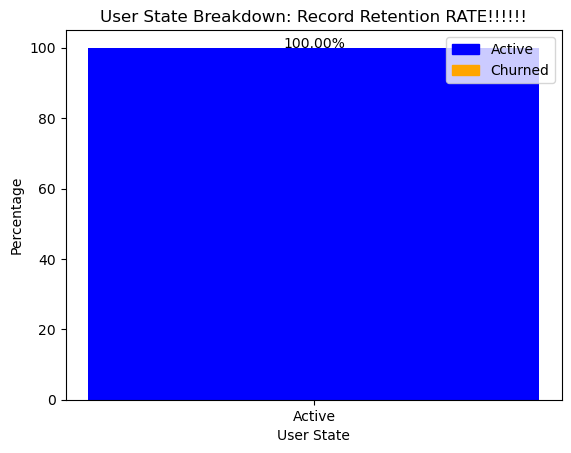

In [115]:
# create a bar chart
colors = ['blue', 'orange']
plt.bar(percentages.index, percentages, color=colors)
plt.title('User State Breakdown: Record Retention RATE!!!!!!')
plt.xlabel('User State')
plt.ylabel('Percentage')

for i, v in enumerate(percentages):
    plt.text(i, v, f"{v:.2f}%", ha='center')
    
handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors]
plt.legend(handles, ['Active', 'Churned'])

plt.show()